# Advanced data analysis: group project

By delivering this notebook, we confirm that the code presented was developed by the following students.

## Student 1: LK
## Student 2: CK


In the solutions for exercises 1 to 5 you should include necessarily one solution using Pandas/scikit learn and one using Spark.

Some useful links:
* [ACM DEBS 2015 Grand Challenge](http://www.debs2015.org/call-grand-challenge.html)

* [Pandas documentations](https://pandas.pydata.org/docs/)

* [scikit-learn](https://scikit-learn.org/stable/)

* [Spark web site](https://spark.apache.org/)

* [Spark MLlib main page](https://spark.apache.org/mllib/)
* [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)

* [Spark GraphX main page](https://spark.apache.org/graphx/)
* [Spark GraphFrames main page](https://graphframes.github.io/graphframes/docs/_site/index.html)
* [Spark GraphFrames User Guide](https://graphframes.github.io/graphframes/docs/_site/user-guide.html)

Run the following cell just to check if it is running in COLAB.

In [2]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules

## Install software

The following cell will install Spark, if the notebook is running on COLAB. 

Before running this cell, you should access the following link [https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing](https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing) and "Add Shortcut to Drive".


In [3]:
# Install needed software
# Run this cell once before running the other cells in the notebook
if IN_COLAB:
    !apt-get install openjdk-11-jdk-headless
    !pip install pyspark    

!pip install gdown
!mkdir checkpoint



Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.17+8-1ubuntu2~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 199 kB 58.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=18313a701ebef36f651b263e0c99af14fc47b8b7288ce0897486966c6f86706e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars graphframes-0.8.2-spark3.2-s_2.12.jar pyspark-shell'


--2022-12-05 20:01:16--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 108.156.83.37, 108.156.83.15, 108.156.83.69, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|108.156.83.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.06s   

2022-12-05 20:01:17 (4.21 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



## Setup Data

The first time you run the notebook, before running this cell, you should access the following link https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing and select the "Add Shortcut to Drive". This will add a shortcut to the datasets to your Google Drive.

The following cell will mount the directory into Colab environment, so that it can be accessed as a local file.


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
#Select the dataset you want to use by uncommnting the appropriate line and running this cell

#Small dataset 100K lines
#FILENAME="/content/drive/MyDrive/group2223/tiny.csv"
#FILENAME="tiny.csv"

#Default dataset 2M lines
FILENAME="/content/drive/MyDrive/group2223/sample.csv"
#FILENAME="sample.csv"

#Huge dataset 173M lines - use only in exercise 0
#FILENAME="/content/drive/MyDrive/group2223/sorted_data.csv"
#FILENAME="sorted_data.csv"



### Alternative way to access data

Alternatively you can access data by downloading the data into the colab running environment. The following sets download different datasets - download the one you need.

Run the following cell to download a **tiny** dataset. You can download it to you computer using this URL: https://drive.google.com/file/d/12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ



In [ ]:
!gdown 12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
!unzip -u tiny.csv.zip
!rm tiny.csv.zip
FILENAME="tiny.csv"


Alternatively, run the following cell to download the **default** dataset. You can download the file to your computer using this URL: 
https://drive.google.com/file/d/1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A

In [ ]:
!gdown 1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A
!unzip -u sample.csv.zip
!rm sample.csv.zip
FILENAME="sample.csv"


You can still run the following cell (this will take some time) to download a **huge** dataset - with 33GB !!! You can download the file to you computer using this URL: https://drive.google.com/file/d/1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5/view?usp=share_link

Use this dataset **only** for computing the result of exercise 0.

In [ ]:
!gdown 1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5
!unzip -u sorted_data.csv.zip
!rm sorted_data.csv.zip
FILENAME="sorted_data.csv"


## Initialization

import libraries.

In [9]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.style.use('seaborn')


Let's start spark session and set *log* level to ERROR.

In [10]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Group project") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.driver.memory", "15g") \
    .getOrCreate()

#if IN_COLAB : 
#    spark.sparkContext.addPyFile('graphframes-0.8.2-spark3.2-s_2.12.jar')
#else:
spark.sparkContext.addPyFile('graphframes-0.8.2-spark3.2-s_2.12.jar')

spark.sparkContext.setCheckpointDir("checkpoint")
spark.sparkContext.setLogLevel('ERROR')


## Simple statistics

First program prints simple statistics.

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

statistics = spark.sql( """SELECT COUNT( DISTINCT medallion) AS num_medallion, 
                                  COUNT( DISTINCT hack_license) AS num_license,
                                  MIN( pickup_datetime) AS min_pickup,
                                  MAX( dropoff_datetime) AS max_dropoff,
                                  MAX( trip_time_in_secs) AS max_trip_time,
                                  MAX( trip_distance) AS max_trip_distance,
                                  MAX( total_amount) AS max_total_amount
                                  FROM data""")
statistics.show()


+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|num_medallion|num_license|         min_pickup|        max_dropoff|max_trip_time|max_trip_distance|max_total_amount|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|        10867|      20354|2013-01-01 00:00:00|2013-01-21 00:11:45|        10800|            95.85|           465.0|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+



## Ploting information

Example on how to plot information using matplotlib.

### First plot

This first plot helps showing that data has several invalid values.

Let's plot the pickups - you can see that there are points quite far from the expected locations. 

Plotting pickups


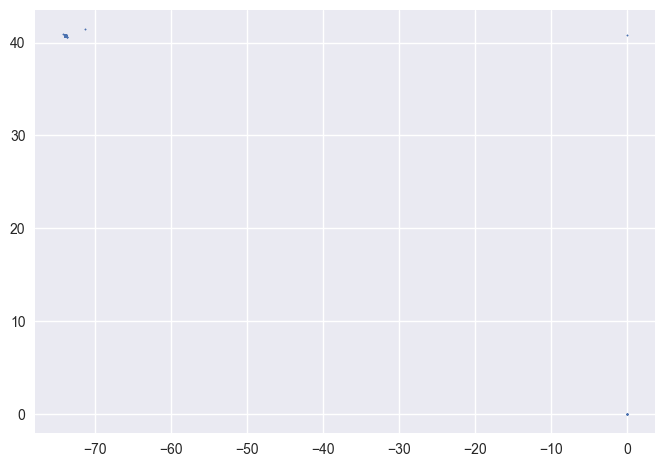

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

# Plotting all points is probably too much in many computers, so lets plot only a few 1000's
data = spark.sql( "SELECT * FROM data LIMIT 1000")
pickups = data.collect()

print('Plotting pickups')
plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            s=1)
plt.show()


### Plotting heatamps

This example shows how to **plot heatmaps** and how to **create a grid** with coordinates -- note that we need to group nearby coordinates together or (almost) every coordinate will be unique.

The example creates a grid, with cell of 150m of side (commented out the code for cells of 500m of side). It also filters out data that is outside of the area of interest - defined by northLatitude, southLatitude, westLatitude, eastLatitude coordinates.

\[From ACM DEBS 2015 Grand Challenge page\]

**Question 1**: Is the earth flat or how to map coordinates to cells?

**Answer**: For the challenge we allow a simplified flat earth assumption for mapping coordinates to cells in the queries. You can assume that a distance of 500 meter south corresponds to a change of 0.004491556 degrees in the coordinate system. For moving 500 meter east you can assume a change of 0.005986 degrees in the coordinate system.

Plotting pickups


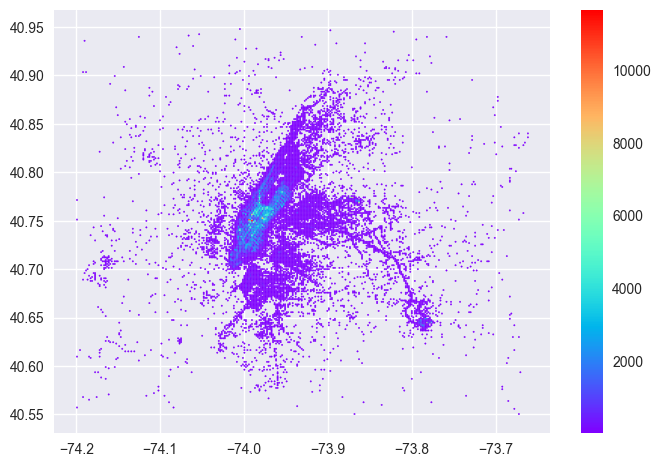

Plotting dropoffs


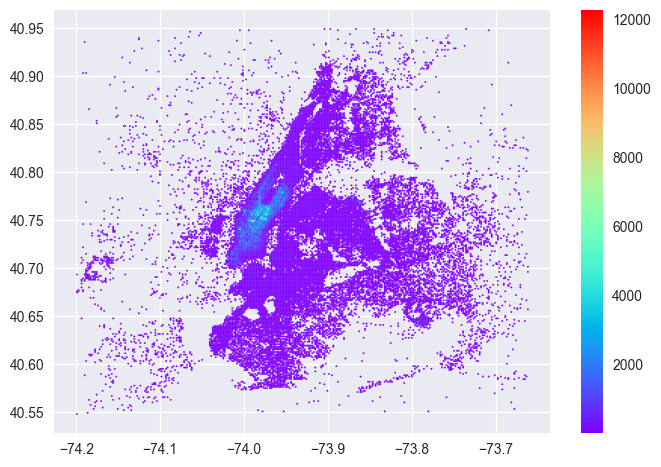

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 500 meters
#latitudeStep = 0.004491556
#longitudeStep = 0.005986
#northLatitude = 41.474937 - 0.5 * latitudeStep
#southLatitude = northLatitude - 300 * latitudeStep
#eastLongitude = -74.913585 - 0.5 * longitudeStep
#westLongitude = eastLongitude + 300 * longitudeStep

# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

# Frequency for pickups
pickupsDF = spark.sql( """SELECT pickup_longitude, pickup_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY pickup_longitude, pickup_latitude""")
pickups = pickupsDF.collect()

print('Plotting pickups')
p = plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            c=[row.cnt for row in pickups],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()

# Statistics for dropoffs
dropoffsDF = spark.sql( """SELECT dropoff_longitude, dropoff_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY dropoff_longitude, dropoff_latitude""")
dropoffs = dropoffsDF.collect()

print('Plotting dropoffs')
p = plt.scatter([row.dropoff_longitude for row in dropoffs],
            [row.dropoff_latitude for row in dropoffs],
            c=[row.cnt for row in dropoffs],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()



## Exercise 0: another simple statistics

This example computes, for each license, the number of trips performed.

We have the code using Spark and Pandas, printing the time for doing the computation.
**Draw some conclusions** by comparing the time for performing the computation using Spark and Pandas, and also when using the different datasets - **Make sure you run each cell more than once and write down the last value**.

### Code: Spark

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

start_time = time.time()
mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")
statistics = spark.sql( """SELECT hack_license, COUNT(*) AS cnt FROM data GROUP BY hack_license""")
statistics.show()

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


+--------------------+---+
|        hack_license|cnt|
+--------------------+---+
|130328475AD7427AF...|125|
|D4F2AE0988ECB2E42...|190|
|DD97899ACAC51EF31...| 27|
|A7C47E60941315A0E...|224|
|9911D66A4A796752D...|148|
|88CB7A1006DB18438...|129|
|069B5562096AF7684...|129|
|28A7C858D9231A3EC...|148|
|A7EE9AEDB7325F55F...|185|
|4B6EFCBC110DB539E...|113|
|AA33AA1CACC8C26E7...|177|
|921E1C7C91CDCF1C6...| 78|
|616E057B1ACDB7B28...|162|
|EFA12B2F45FC838E1...|153|
|D0D1271283601BF84...|199|
|138B0A7B7D3B898E4...|134|
|0FBF11956EE14B253...|155|
|8821CA9250E34A869...|141|
|BE047851D97506885...|  7|
|02856AFC22881ABCA...|186|
+--------------------+---+
only showing top 20 rows

Runtime = 2.506254196166992


### Results (Spark)

**tiny dataset**

The time to process the tiny dataset was : 0.2342836856842041 seconds. Running locally on MacBook Pro (Apple M1 Pro)

**sample dataset**

The time to process the sample dataset was : 2.611894130706787 seconds. Running locally on MacBook Pro (Apple M1 Pro)

**sorted_data dataset**

The time to process the sorted_data dataset was : 206.2679569721222 seconds. Running locally on MacBook Pro (Apple M1 Pro)


### Code: Pandas library

In [ ]:
start_time = time.time()
mySchema = ["medallion", "hack_license", "pickup_datetime",
            "dropoff_datetime", "trip_time_in_secs", "trip_distance",
            "pickup_longitude", "pickup_latitude", "dropoff_longitude",
            "dropoff_latitude", "payment_type", "fare_amount", 
            "surcharge", "mta_tax", "tip_amount",
            "tolls_amount", "total_amount"]

dataset = pd.read_csv(FILENAME,names=mySchema)
result = dataset.groupby("hack_license").count()
print(result)

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


                                  medallion  pickup_datetime  \
hack_license                                                   
0008B3E338CE8C3377E071A4D80D3694        129              129   
000B8D660A329BBDBF888500E4BD8B98          2                2   
000CCA239BFDC0ABE2895AC9086C4290         11               11   
00184958F5D5FD0A9EC0B115C5B55796         62               62   
001C8AAB90AEE49F36FCAA7B4136C81A        178              178   
...                                     ...              ...   
FFF5AD65C673251C1F275CF5B43EC414          2                2   
FFF6401CC16911710E7590FE197E986A         33               33   
FFF657CFEC6A06384C97ACB500916913         68               68   
FFF909B1353148850AD3E40BB878618B        124              124   
FFFBCEA3D4E21E05902EE67AD556F67C        177              177   

                                  dropoff_datetime  trip_time_in_secs  \
hack_license                                                            
0008B3E338CE8C3377E07

### Results (Pandas)

**tiny dataset**

The time to process the tiny dataset was : 0.1775341033935547 seconds. Running locally on MacBook Pro (Apple M1 Pro)

**sample dataset**

The time to process the sample dataset was : 3.1360740661621094 seconds. Running locally on MacBook Pro (Apple M1 Pro)

**sorted_data dataset**

Jupiter kernel crashed after 8 min 17 seconds reaching a 40 GB swap memory size and beeing killed by MacOS. Running locally on MacBook Pro (Apple M1 Pro) 16GB Memory.

#### Results discussion

- Based on the supplied data, both code cells provide the same output.
In both instances, a groupBy() on the column "hack license" is used, and the resulting groups are then subjected to the aggregate function count(), which returns the number of rows per group.
On smaller datasets, pandas and spark should perform similarly, but on larger datasets, they should perform substantially differently.
Pandas uses a single machine for all of its operations, which results in a linear rise in resource usage as data size rises.
Additionally, the RAM is heavily utilized for bigger datasets since an operation's working data must fit there until the process is finished. 
In order to divide the total amount of work into separate tasks that can be processed independently, Spark is able to distribute operations across multiple nodes.
With limited hardware, pandas would no longer be able to process large datasets, but this attribute allows spark to do so.

- This theory is supported by the findings.
With the exception of pandas being slightly faster, both libraries perform similarly on the tiny dataset.
Spark appears to be ahead of pandas by 0.5 seconds on the sample dataset.
Spark is still able to produce an output on the sorted dataset after 206 seconds, in contrast to pandas, which is unable to process this volume of data.

- On a MacBook Pro (Apple M1 Pro) with 16GB of memory, the test was run locally.  

## Exploratory data analysis

In [ ]:
# Data Cleaning
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()


mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")

# Convert dataset from sparkDF into pandasDF
pandasDF = dataset.select("*").toPandas()

# Check if columns or rows containing any missing values na because of fare amount
# It is not the case because we are getting the boolean value of False
print(pandasDF.isna().any(axis=0).unique())
print(pandasDF.isna().any(axis=1).unique())

# 6.
# Check if fare_amount + surcharge + mta_tax + tip_amount + tolls_amount = total_amount

df1= pandasDF[['fare_amount','surcharge','mta_tax','tip_amount','tolls_amount','total_amount']].copy()
df1['manuel_total_amount'] = df1[['fare_amount','surcharge','mta_tax','tip_amount','tolls_amount']].sum(axis=1).round(decimals=2)
#df1['Comparison_manuel_given_total_amount']= df1.loc[df1['total_amount'] == df1['manuel_total_amount']]
df1['Comparison_manuel_given_total_amount']= df1['total_amount'].equals(df1['manuel_total_amount'])
df1['Substraction_manuel_given_total_amount']= df1['total_amount'] - df1['manuel_total_amount']
print(df1.Substraction_manuel_given_total_amount.unique())
print(df1.Comparison_manuel_given_total_amount.unique())

df1

# Total amount contains no errors because both columns are equal

[False]
[False]
[0.]
[ True]


,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,manuel_total_amount,Comparison_manuel_given_total_amount,Substraction_manuel_given_total_amount
0,3.5,0.5,0.5,0.0,0.0,4.5,4.5,True,0.0
1,27.0,0.0,0.5,0.0,0.0,27.5,27.5,True,0.0
2,4.0,0.5,0.5,0.0,0.0,5.0,5.0,True,0.0
3,4.0,0.5,0.5,0.0,0.0,5.0,5.0,True,0.0
4,4.0,0.5,0.5,0.0,0.0,5.0,5.0,True,0.0
...,...,...,...,...,...,...,...,...,...
1999994,7.5,0.5,0.5,1.7,0.0,10.2,10.2,True,0.0
1999995,36.0,0.5,0.5,5.0,4.8,46.8,46.8,True,0.0
1999996,12.0,0.5,0.5,2.6,0.0,15.6,15.6,True,0.0
1999997,28.5,0.5,0.5,6.0,0.0,35.5,35.5,True,0.0


## Data Cleaning

In [ ]:
# Cleaning filtern with spark sql and not pandas
#Squares of 500 meters
latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep
threshold_zero_trip_duration = 0
threshold_zero_trip_distance = 5


# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")


dataset.createOrReplaceTempView("data")
filteredDataDF_q1 = spark.sql( """SELECT medallion,hack_license, pickup_datetime,
                                    date(pickup_datetime) AS pickup_date,
                                    dayofweek(pickup_datetime) AS pickup_weekday,
                                    hour(pickup_datetime) AS pickup_hour,
                                    dropoff_datetime, 
                                    date(dropoff_datetime) AS dropoff_date,
                                    dayofweek(dropoff_datetime) AS dropoff_weekday,
                                    hour(dropoff_datetime) AS dropoff_hour,
                                    trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_time_in_secs > """ + str(threshold_zero_trip_duration) + """ AND
                                  trip_distance >= """ + str(threshold_zero_trip_distance) + """ AND
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude) + """ AND
                                  payment_type in ('CRD','CSH')
                                  ORDER BY trip_time_in_secs ASC """
                                  )
filteredDataDF_q1.createOrReplaceTempView("data")



## Exercise 1

Let's start by trying to help the city to identify which new bus routes should be introduced. To this end, you should find the most frequent routes whose distance is above a given treshold (defined by you).

For establishing these routes, we suggest that you use a grid of 500m of side.

In [ ]:
#treshold 5 kilometre
filteredDataDF_q1.groupBy('pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude') \
                            .count() \
                            .sort(desc('count')) \
                                .limit(10) \
                                    .show()

+----------------+------------------+-----------------+------------------+-----+
|pickup_longitude|   pickup_latitude|dropoff_longitude|  dropoff_latitude|count|
+----------------+------------------+-----------------+------------------+-----+
|      -73.872021| 40.77425426399999|       -73.973783|40.756288039999994|  665|
|      -73.985755| 40.76077959599999|       -73.872021| 40.77425426399999|  524|
|      -73.872021| 40.77425426399999|       -73.979769| 40.76077959599999|  503|
|      -73.872021| 40.77425426399999|       -73.985755| 40.76077959599999|  497|
|      -73.872021| 40.77425426399999|       -73.985755|40.756288039999994|  494|
|      -73.872021| 40.77425426399999|       -73.973783| 40.75179648399999|  479|
|      -73.979769| 40.76077959599999|       -73.872021| 40.77425426399999|  452|
|      -73.973783|40.756288039999994|       -73.872021| 40.77425426399999|  424|
|      -73.872021| 40.77425426399999|       -73.979769| 40.76527115199999|  418|
|      -73.866035|40.7697627

#### Discussion
1. we create a dataframe filteredDataDF_q1 with a 5 kilometre threshold for the column 'trip_distance'
2. We group by 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' and count the rows per group.

The result shows that a bus line could be established between the cluster -73.872021 - 40.77425426399999 and the cluster -73.973783 - 40.756288039999994 since this route seems to be the most used for longer taxi rides.

## Exercise 2

The taxi trips can be classified in two categories, depending on whether the client has given a tip or not (or alternatively in three categories - no tip, low percentage tip, high percentage tip). Propose a method to predict the class of a given trip (for the prediction, you cannot use the value of the tip).


In [ ]:
# Cleaning filtern with spark sql and not pandas
#Squares of 500 meters
latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep
threshold_zero_trip_duration = 0
threshold_zero_trip_distance = 0

# Squares of 150 meters
#latitudeStep = 0.0013474668
#longitudeStep = 0.0017958
#northLatitude = 40.95
#southLatitude = northLatitude - 300 * latitudeStep
#eastLongitude = -74.2
#westLongitude = eastLongitude + 300 * longitudeStep
#threshold_zero_trip_duration = 0


# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")


dataset.createOrReplaceTempView("data")
filteredDataDF_q2 = spark.sql( """SELECT medallion,hack_license, pickup_datetime,
                                    date(pickup_datetime) AS pickup_date,
                                    dayofweek(pickup_datetime) AS pickup_weekday,
                                    hour(pickup_datetime) AS pickup_hour,
                                    dropoff_datetime, 
                                    date(dropoff_datetime) AS dropoff_date,
                                    dayofweek(dropoff_datetime) AS dropoff_weekday,
                                    hour(dropoff_datetime) AS dropoff_hour,
                                    trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_time_in_secs > """ + str(threshold_zero_trip_duration) + """ AND
                                  trip_distance >= """ + str(threshold_zero_trip_distance) + """ AND
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude) + """ AND
                                  payment_type in ('CRD','CSH')
                                  ORDER BY trip_time_in_secs ASC """
                                  )
filteredDataDF_q2.createOrReplaceTempView("data")


#### Feature engineering:

In [ ]:
tip_function = udf(lambda x: int(1) if int(x) > 0 else int(0))
tip_function_3 = udf(lambda x: int(0) if x == 0  else (int(1) if x < 0.2001 else 2))
payment_function = udf(lambda x: 1 if str(x) == 'CRD' else 0)
filteredDataDF_q2 = filteredDataDF_q2.withColumn('cash_card', payment_function('payment_type').cast(IntegerType()))
filteredDataDF_q2 = filteredDataDF_q2.withColumn('tip/fare', filteredDataDF_q2.tip_amount/filteredDataDF_q2.fare_amount)
filteredDataDF_q2 = filteredDataDF_q2.withColumn('tip_nontip', tip_function('tip_amount').cast(IntegerType()))
filteredDataDF_q2 = filteredDataDF_q2.withColumn('3_tip', tip_function_3('tip/fare').cast(IntegerType()))

pandasDF = filteredDataDF_q2.select("*").toPandas()
print(pandasDF['3_tip'].value_counts())
display(pandasDF.head(10))
corr_matrix = pandasDF.corr(numeric_only=True)
display(corr_matrix.style.background_gradient(cmap='coolwarm'))

0    1001023
1     506890
2     448872
Name: 3_tip, dtype: int64


,medallion,hack_license,pickup_datetime,pickup_date,pickup_weekday,pickup_hour,dropoff_datetime,dropoff_date,dropoff_weekday,dropoff_hour,...,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,total_amount,cash_card,tip/fare,tip_nontip,3_tip
0,859015006B86E24555926C8FF4BAF9DC,E8E22AC46DF6AC99C28C6860779A648C,2013-01-01 03:41:38,2013-01-01,3,3,2013-01-01 03:41:40,2013-01-01,3,3,...,CRD,2.5,0.5,1.05,0.0,4.55,1,0.420000,1,2
1,04D5558597E59882587C513ACBBD5326,D3B2DEC5DB78D91D9AFADA53B3B521B5,2013-01-01 10:55:28,2013-01-01,3,10,2013-01-01 10:55:29,2013-01-01,3,10,...,CRD,2.5,0.5,2.50,0.0,5.50,1,1.000000,1,2
2,A9CC55AF6FD894538AE1EDDB268FC7F3,881978E78ADB8C672D71A7DEC217FD1A,2013-01-03 05:03:52,2013-01-03,5,5,2013-01-03 05:03:53,2013-01-03,5,5,...,CRD,2.5,0.5,0.70,0.0,4.20,1,0.280000,0,2
3,DD6DC400E225EB70D59A71D491254DE8,57D463B8F4C3382081F206E6869AA095,2013-01-03 20:30:19,2013-01-03,5,20,2013-01-03 20:30:20,2013-01-03,5,20,...,CRD,52.0,0.5,10.50,0.0,63.00,1,0.201923,1,2
4,0C46A0B4C6DDBA259CBAA2B8F07305D2,69B6FBD28F84175AB1504F6BFF001A49,2013-01-04 06:25:50,2013-01-04,6,6,2013-01-04 06:25:51,2013-01-04,6,6,...,CRD,20.0,0.0,20.00,0.0,40.00,1,1.000000,1,2
5,B7A16B1C396F4A5113257DDEB043D953,0838C4C7DDFD9391AD66E316B5608B26,2013-01-01 17:20:56,2013-01-01,3,17,2013-01-01 17:20:58,2013-01-01,3,17,...,CRD,52.0,0.5,8.00,0.0,60.50,1,0.153846,1,1
6,76EEA46F26DE98F4EC585F679D71B416,48AAC816C248C98A8C71BF0168A6C303,2013-01-20 21:57:20,2013-01-20,1,21,2013-01-20 21:57:22,2013-01-20,1,21,...,CRD,60.0,0.0,5.00,0.0,65.00,1,0.083333,1,1
7,BC7B1CCB7CCEB406EA92ECC224B1AC9D,7C3D154C4704AAE0F96D80C173A5C755,2013-01-03 06:05:20,2013-01-03,5,6,2013-01-03 06:05:24,2013-01-03,5,6,...,CRD,52.0,0.5,7.00,0.0,59.50,1,0.134615,1,1
8,16129167D9E7B0846DBA3D04B78E1B8D,18F58F1A25D559B9F990AA1BAACC7D3E,2013-01-18 20:26:07,2013-01-18,6,20,2013-01-18 20:26:10,2013-01-18,6,20,...,CRD,2.5,0.5,5.00,0.0,8.50,1,2.000000,1,2
9,83DBDC139E67CEEA2334FA25AC75A2C4,9A19D4463545EEB3AEA47B3721BD670C,2013-01-03 16:58:52,2013-01-03,5,16,2013-01-03 16:58:57,2013-01-03,5,16,...,CRD,2.5,0.5,1.00,0.0,5.00,1,0.400000,1,2


,pickup_weekday,pickup_hour,dropoff_weekday,dropoff_hour,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,mta_tax,tip_amount,tolls_amount,total_amount,cash_card,tip/fare,tip_nontip,3_tip
pickup_weekday,1.000000,-0.028235,0.995674,-0.030359,-0.012513,-0.027434,-0.026380,-0.014053,-0.014893,-0.017130,-0.025042,0.000680,-0.032327,-0.031166,-0.028666,-0.019799,-0.017868,-0.019778,-0.013269
pickup_hour,-0.028235,1.000000,-0.026363,0.956913,-0.029045,-0.035493,0.004823,0.005246,-0.053707,0.005551,-0.037832,0.012772,0.006274,-0.008545,-0.020785,0.020653,0.025184,0.029635,0.070200
dropoff_weekday,0.995674,-0.026363,1.000000,-0.033010,-0.011399,-0.025410,-0.025303,-0.014695,-0.014085,-0.017491,-0.023232,0.000600,-0.031220,-0.030417,-0.026867,-0.019661,-0.017788,-0.019624,-0.012993
dropoff_hour,-0.030359,0.956913,-0.033010,1.000000,-0.020183,-0.034419,0.006615,0.008909,-0.052453,0.008189,-0.034940,0.010860,0.006137,-0.003306,-0.018341,0.019655,0.024043,0.028796,0.065079
trip_time_in_secs,-0.012513,-0.029045,-0.011399,-0.020183,1.000000,0.814532,0.356851,-0.222638,0.240270,-0.197474,0.855478,-0.092909,0.434953,0.424553,0.833467,0.089295,0.015570,0.106933,0.039598
trip_distance,-0.027434,-0.035493,-0.025410,-0.034419,0.814532,1.000000,0.519879,-0.296927,0.356480,-0.187676,0.945306,-0.153369,0.490103,0.596348,0.934684,0.079352,0.018637,0.086250,0.039634
pickup_longitude,-0.026380,0.004823,-0.025303,0.006615,0.356851,0.519879,1.000000,-0.126053,0.286634,0.037610,0.481390,0.002913,0.238509,0.359765,0.478521,-0.007185,-0.017678,-0.008687,-0.028592
pickup_latitude,-0.014053,0.005246,-0.014695,0.008909,-0.222638,-0.296927,-0.126053,1.000000,0.049422,0.408729,-0.279739,0.007346,-0.144948,-0.090862,-0.269085,-0.042051,-0.023993,-0.044519,-0.038138
dropoff_longitude,-0.014893,-0.053707,-0.014085,-0.052453,0.240270,0.356480,0.286634,0.049422,1.000000,0.133778,0.311813,0.190410,0.123436,0.162783,0.299212,-0.033928,-0.032644,-0.036970,-0.038839
dropoff_latitude,-0.017130,0.005551,-0.017491,0.008189,-0.197474,-0.187676,0.037610,0.408729,0.133778,1.000000,-0.195462,0.054143,-0.113677,-0.060452,-0.189797,-0.045260,-0.030585,-0.047924,-0.047361


#### Thoughts:

- Choosing Features: If we look at the correlation matrix, we can select certain features for our model that correlate most with our target variable tip_nontip. The problem here is that only payment related columns like 'tip_amount' or 'cash_card' correlate heavily with 'tip_nontip'. Therefore, a model which is only using non payment related columns is going to perform much worse than a model that takes for example the payment method into account. We will try both and compare the results.

- Choosing a Model: Since our target variable is not a continuous number, but a binary value that is either 1 or 0 a Linear Regression Model is not applicable for this task. Therefore, we need to use a classification algorithm to train our model. We will use a Logistic Regression and a Random Forest Classifier to train our model and compare the results.

- Oversampling: We should check whether the classes are unbalanced. An unbalanced dataset could decrease the models performance significantly.

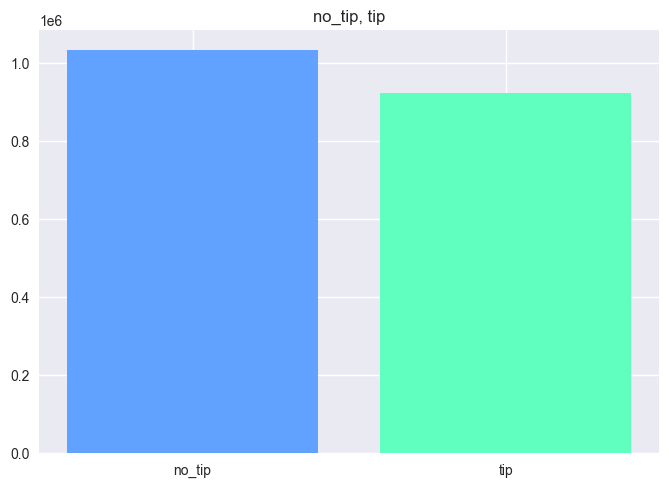

0    1034197
1     922588
Name: tip_nontip, dtype: int64


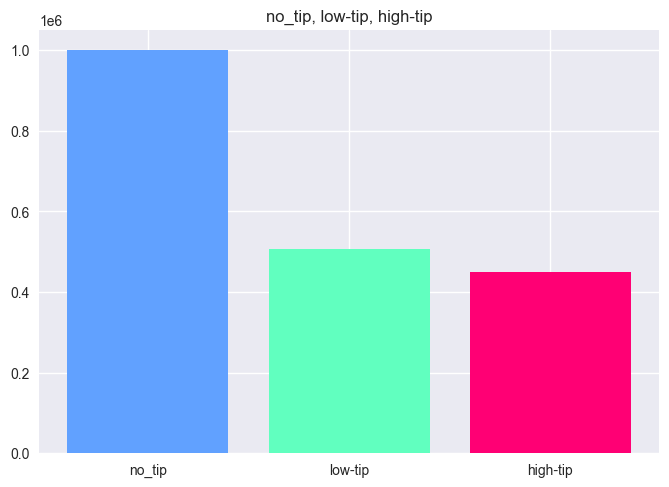

0    1001023
1     506890
2     448872
Name: 3_tip, dtype: int64


In [ ]:
def plot_class_distribution(height, bars, colors, title):
    y_pos = np.arange(len(bars))

    plt.bar(y_pos, height, color=colors)
    plt.xticks(y_pos, bars)
    plt.title(title)
    plt.show()
    print(height)

plot_class_distribution(pandasDF['tip_nontip'].value_counts(), ('no_tip', 'tip'), ['#61A1FF', '#61FFBF'], 'no_tip, tip')
plot_class_distribution(pandasDF['3_tip'].value_counts(), ['no_tip', 'low-tip', 'high-tip'], ['#61A1FF', '#61FFBF', '#FF0074'], 'no_tip, low-tip, high-tip')

- For two binary classes we don't need to oversample the smaller class since both classes have a similar size
- Using 3 classes we chose a threshold of 20.01 % to distinguish between low-tip and high-tip to create equally sized classes. Since the classes low-tip and high-tip are much smaller then no-tip, we are going to use SMOT to oversample the smaller classes.

In [ ]:
def model_builder(dfx, dfy, model, smot): 
    x_train, x_test, y_train, y_test = train_test_split(dfx, dfy ,test_size =0.2, random_state = 42)

    if smot == 1:
        sm = SMOTE(random_state=100, sampling_strategy= 'not majority')
        x_train, y_train = sm.fit_resample(x_train, y_train)
        plot_class_distribution(y_train.value_counts(), ['no_tip', 'low-tip', 'high-tip'], ['#61A1FF', '#61FFBF', '#FF0074'], 'no_tip, low-tip, high-tip')

    model.fit(x_train, y_train.values.ravel())
 
    y_pred_test  = model.predict(x_test)
    matrix_confusion = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted_Label')
    plt.ylabel('Truth_Label')
    plt.title('Confusion Matrix - ' + str(model))
    plt.show()
    print(metrics.classification_report(y_test, y_pred_test, digits=3))

#### Binary classification: 

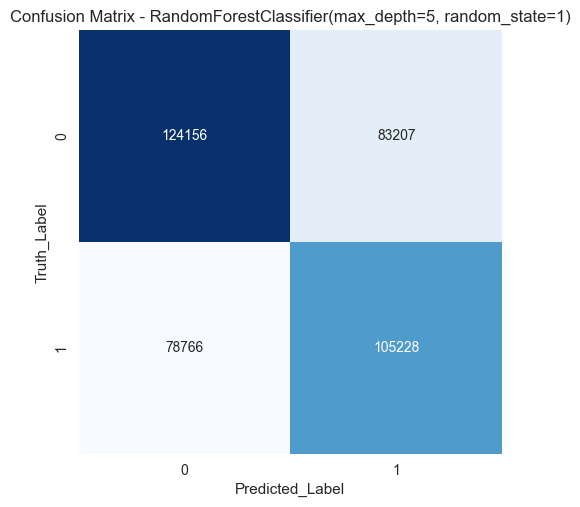

              precision    recall  f1-score   support

           0      0.612     0.599     0.605    207363
           1      0.558     0.572     0.565    183994

    accuracy                          0.586    391357
   macro avg      0.585     0.585     0.585    391357
weighted avg      0.587     0.586     0.586    391357



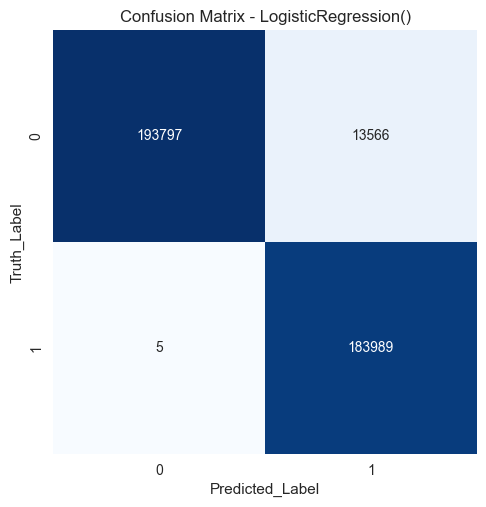

              precision    recall  f1-score   support

           0      1.000     0.935     0.966    207363
           1      0.931     1.000     0.964    183994

    accuracy                          0.965    391357
   macro avg      0.966     0.967     0.965    391357
weighted avg      0.968     0.965     0.965    391357



In [ ]:
model_builder(pandasDF[['pickup_hour', 'pickup_weekday', 'pickup_longitude', 'pickup_latitude', 'trip_time_in_secs', 'trip_distance', 'dropoff_longitude', 'dropoff_latitude']], pandasDF[['tip_nontip']], RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1), 0)
model_builder(pandasDF[['cash_card']], pandasDF[['tip_nontip']], LogisticRegression(), 0)

- The RandomForestClassifier model, which uses the features "pickup hour," "pickup weekday," "pickup longitude," "pickup latitude," "trip time in secs," "trip distance," "dropoff longitude," and "dropoff latitude," achieved the best accuracy of 58.6% compared to other combinations of Classifiers and features. We were unable to further improve this model's performance. The target variable and our chosen features have a very low correlation, making it impossible to further improve the model using the data at hand. 
- A model that only uses the "cash card" column achieves a 96.5% accuracy rate. To be able to predict a value at the start of the taxi ride, we only wanted to include features that were unrelated to money, so we left this feature out of our initial model. 

#### Non binary classification

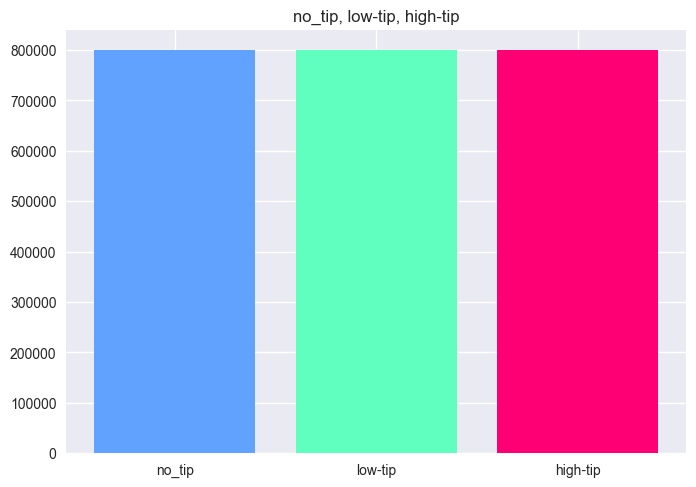

3_tip
0        800277
1        800277
2        800277
dtype: int64


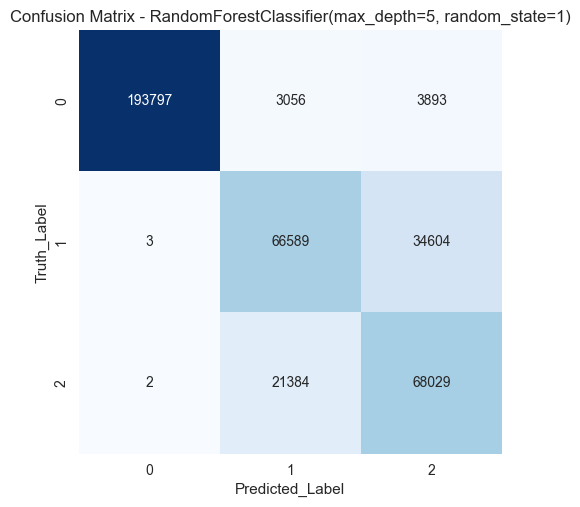

              precision    recall  f1-score   support

           0      1.000     0.965     0.982    200746
           1      0.732     0.658     0.693    101196
           2      0.639     0.761     0.694     89415

    accuracy                          0.839    391357
   macro avg      0.790     0.795     0.790    391357
weighted avg      0.848     0.839     0.842    391357



In [ ]:
model_builder(pandasDF[['pickup_hour', 'pickup_weekday', 'pickup_longitude', 'pickup_latitude', 'trip_time_in_secs', 'trip_distance', 'dropoff_longitude', 'dropoff_latitude', 'cash_card' ]], pandasDF[['3_tip']], RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1), 1)

- for the non-binary classification we had to include the column 'cash_card' to achieve a satisfying result.
- Our model is able to distinguish between 3 classes with an accuracy of 83.9 %.

## Exercise 3

The third question intends to help taxi drivers to decide to which area of the city they should go next. To this end, we could have a web site/mobile app where the drivers could check the best area at a given moment. To support such application efficiently, it would be necessary to have a pre-computed index with the value for each area and period of time (e.g. combining the week day and a period of one hour). 

You should create the program to create such index. The output tuples should be something like: longitude latitude day_of_week hour value.

Define your own metric for the value of an area. Parameters that may be included in such metric include: the number of pickups in the area, the amount collected in the trip, the average time a taxi is idle in the area, etc.

Besides presenting the code, explain the rationale of your solution.

**Note:** SQL functions date(col), dayofweek(col) and hour(col) return, respectively, the date, day of week and hour of a datatime in column col.

In [ ]:
# Cleaning filtern with spark sql and not pandas
#Squares of 500 meters
latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep
threshold_zero_trip_duration = 0
threshold_zero_trip_distance = 0


# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")


dataset.createOrReplaceTempView("data")
filteredDataDF_q3 = spark.sql( """SELECT medallion,hack_license, pickup_datetime,
                                    date(pickup_datetime) AS pickup_date,
                                    dayofweek(pickup_datetime) AS pickup_weekday,
                                    hour(pickup_datetime) AS pickup_hour,
                                    dropoff_datetime, 
                                    date(dropoff_datetime) AS dropoff_date,
                                    dayofweek(dropoff_datetime) AS dropoff_weekday,
                                    hour(dropoff_datetime) AS dropoff_hour,
                                    trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_time_in_secs > """ + str(threshold_zero_trip_duration) + """ AND
                                  trip_distance >= """ + str(threshold_zero_trip_distance) + """ AND
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude) + """ AND
                                  payment_type in ('CRD','CSH')
                                  ORDER BY trip_time_in_secs ASC """
                                  )
filteredDataDF_q3.createOrReplaceTempView("data")



In [ ]:
# SQL based group by and join of dataframes

# Create group by DF pickup
pickup_grouped = spark.sql( """SELECT pickup_longitude,
                                  pickup_latitude,pickup_weekday,
                                  pickup_hour, COUNT(pickup_longitude) AS NumberOfPickups
                                  FROM data
                                  GROUP BY pickup_longitude,pickup_latitude,pickup_weekday,pickup_hour
                                  ORDER BY NumberOfPickups DESC""")

# Create group by DF dropoff

dropoff_grouped = spark.sql( """SELECT dropoff_longitude,
                                  dropoff_latitude,dropoff_weekday,
                                  dropoff_hour, COUNT(dropoff_longitude) AS NumberOfDropoffs
                                  FROM data
                                  GROUP BY dropoff_longitude,dropoff_latitude,dropoff_weekday,dropoff_hour
                                  ORDER BY NumberOfDropoffs DESC""")

# Join DFs and add calculated column delta of the demand

def delta_values(val1,val2):
    return val1 - val2
spark.udf.register("delta_val1_val2", delta_values, IntegerType())

pickup_grouped.createOrReplaceTempView("data_pickup_grouped")
dropoff_grouped.createOrReplaceTempView("data_dropoff_grouped")
merged_pickup_dropoff = spark.sql( """SELECT pickup_longitude AS longitude_point,
                                  pickup_latitude AS latitude_point,pickup_weekday AS weekday,
                                  pickup_hour AS hour, NumberOfPickups, NumberOfDropoffs,
                                  delta_val1_val2(NumberOfDropoffs, NumberOfPickups) AS Metric
                                  FROM data_pickup_grouped
                                  INNER JOIN data_dropoff_grouped ON pickup_longitude = dropoff_longitude AND 
                                  pickup_latitude = dropoff_latitude AND
                                  pickup_weekday = dropoff_weekday AND
                                  pickup_hour = dropoff_hour
                                  ORDER BY Metric DESC""")
pickup_grouped.createOrReplaceTempView("data_pickup_grouped")
dropoff_grouped.createOrReplaceTempView("data_dropoff_grouped")

# spark DF to pandas DF for group by weekday and hour to keep the longitude and latitude as column after it

pandasDF = merged_pickup_dropoff.select("*").toPandas()

finalDF = pandasDF[0:0].copy()

for weekday in pandasDF.weekday.unique(): 
    for hour in pandasDF[pandasDF.weekday == weekday].hour.unique():
        temp = pandasDF[(pandasDF.weekday == weekday) & (pandasDF.hour == hour)].nlargest(1, 'Metric').index
        list = pandasDF.iloc[temp].values.flatten().tolist()
        finalDF.loc[len(finalDF.index)] = list
display(finalDF.sort_values(by=['weekday', 'hour']).reset_index(drop=True).head(50))

,longitude_point,latitude_point,weekday,hour,NumberOfPickups,NumberOfDropoffs,Metric
0,-74.003713,40.742813,1.0,0.0,35.0,65.0,30.0
1,-73.991741,40.751796,1.0,1.0,5.0,17.0,12.0
2,-73.991741,40.751796,1.0,2.0,7.0,26.0,19.0
3,-73.949839,40.783237,1.0,3.0,1.0,18.0,17.0
4,-73.979769,40.747305,1.0,4.0,8.0,22.0,14.0
5,-73.955825,40.778746,1.0,5.0,1.0,6.0,5.0
6,-73.997727,40.760780,1.0,6.0,5.0,21.0,16.0
7,-73.997727,40.760780,1.0,7.0,13.0,60.0,47.0
8,-73.991741,40.751796,1.0,8.0,26.0,95.0,69.0
9,-73.991741,40.751796,1.0,9.0,49.0,100.0,51.0


#### Discussion

The cab driver need a broad list of days of the week (weekdays 1–7) and hours of the day (0-23) to inform him where to travel next. Using the spark sql function weekday, Sunday is day 1 and Saturday is day 7.
We utilized spark sql to generate queries and our cleaned dataset for this.

First, we generated two DFs, one for pickups and one for dropoffs, each containing pickup longitude, pickup latitude, pickup weekday, pickup hour, and NumberOfPickups. We then combined these DFs into a longitude point and latitude point, as well as the number of pickups and dropoffs.

In addition, we developed our own metric. This is the delta of pickups and dropoffs (Dropoff - pickup = Demand pickup excess) to get the pickup demand to a certain weekday and hour. There is an excess demand (delta >0) if there are more dropoffs than pickups in one region, because not all customers have been picked up by other taxis and there is a lingering unused demand of people. If it is not too far away and does not take too much time, the cab driver should find a customer and head there next.

Therefore as result, it may be presumed that there are still enough individuals who require a cab, because they prefer to drive a cab and have utilized no other mode of transportation to get there. Furthermore, there are likely to be even more individuals in need of a cab, as the area appears to be quite appealing given the large number of dropoffs. This is to be expected given how many people went there.

We grouped the merged dataframe with the deltas by weekday and hour to build a generic list for the driver for each weekday and hour. This assures that the list has just 24*7 entries, i.e. 168 items. As a result, the maximum of demand excess in one specific location is recommended for each hour and day of the week. This is the maximum of the deltas, and hence the surplus demand. The maximum is significant since there are several sites for a day and hour that produce a delta and demand overhang. However, we want the most potential so that the cab driver receives a recommendation for the best possible placement, which should be close to his current position. We were unable to optimize this due to a lack of data.

Finally, we transformed the table to a pandas DF since the grouping removes the longitude and latitude, and hence the location with the greatest demand overhang. We got them back with for loops by reconnecting them to the DF.

Using a 500qm raster to center all points in that region to a single point so that we may count the same GPS data. The dataset contains more dropoff locations than pickup points, implying that at certain sites, individuals were dropped off but no one was picked up.


#### Assumption: 

If no one asked to be picked up from that spot the previous days and just dropped off, it is not worth going there and waiting for clients.
That is why we are using the inner join, which only considers places where people are picked up and dropped off, so that there is a high demand for picking up at this point and it is worthwhile to wait for consumers.
Of course, for a truly excellent recommendation, we also need the driver's position, which will go to the best nearby position because the good point is often too far away from the driver, especially in a metropolis like New York. Furthermore, we would need the population because a negative delta only makes sense if there are more individuals in an area than were dropped by a cab, therefore the total number of people in an area equals the dropped people + alive people or general people in the region. That is why a cab may pick up more people than it drops off. This also means that going to that location and assuming there are more interested persons is pointless.

## Exercise 4

The fourth question intends to help define the location of taxi ranks (the places where taxis stop waiting for collecting clients) in a way that tries to minimize the distance a client needs to travel to reach the taxi rank.

Consider that you want to establish, at least, 100 taxi ranks but no more than 150 - present the code that defines the number and locations of the ranks.

**Note:** This dataset is for NYC taxis. So, pickups outside of the city are infrequent and not representative of the demand in such areas. As such, you should focus on pickups in a square that includes NYC (it is ok if the square includes parts outside of the city). Use, for example, the following square:
```
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92
```

**Suggestion:** Plot your results as a heatmap, with the color being a measurement of the value of the taxi rank; use the visual feedback to enhance your solution.

In [ ]:
#Small dataset 100K lines
#FILENAME="/content/drive/MyDrive/group2223/tiny.csv"

#Default dataset 2M lines
#FILENAME="/content/drive/MyDrive/group2223/sample.csv"
#FILENAME="sample.csv"

# Data Cleaning for Question 4
# Squares in question 4
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92
threshold_zero_trip_duration = 0


mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")


dataset.createOrReplaceTempView("data")
filteredDataDF_q4 = spark.sql( """SELECT medallion,hack_license, pickup_datetime,
                                    date(pickup_datetime) AS pickup_date,
                                    dayofweek(pickup_datetime) AS pickup_weekday,
                                    hour(pickup_datetime) AS pickup_hour,
                                    dropoff_datetime, 
                                    date(dropoff_datetime) AS dropoff_date,
                                    dayofweek(dropoff_datetime) AS dropoff_weekday,
                                    hour(dropoff_datetime) AS dropoff_hour,
                                    trip_time_in_secs, trip_distance,
                                    pickup_longitude, 
                                    pickup_latitude,
                                    dropoff_longitude, 
                                    dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_time_in_secs > """ + str(threshold_zero_trip_duration) + """ AND
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude) + """ AND
                                  payment_type in ('CRD','CSH')
                                  ORDER BY trip_time_in_secs ASC """
                                  )
filteredDataDF_q4.createOrReplaceTempView("data")

      num     score
0   100.0  0.521464
1   101.0  0.524200
2   102.0  0.523515
3   103.0  0.513298
4   104.0  0.527388
5   105.0  0.528563
6   106.0  0.515719
7   107.0  0.514416
8   108.0  0.518280
9   109.0  0.519725
10  110.0  0.521324
11  111.0  0.521003
12  112.0  0.513708
13  113.0  0.524098
14  114.0  0.527985
15  115.0  0.528012
16  116.0  0.526165
17  117.0  0.525382
18  118.0  0.519375
19  119.0  0.515718
20  120.0  0.527704
21  121.0  0.525567
22  122.0  0.525060
23  123.0  0.526257
24  124.0  0.526458
25  125.0  0.526232
26  126.0  0.524502
27  127.0  0.521495
28  128.0  0.525561
29  129.0  0.529872
30  130.0  0.526053
31  131.0  0.518081
32  132.0  0.521764
33  133.0  0.520639
34  134.0  0.528415
35  135.0  0.525390
36  136.0  0.531236
37  137.0  0.521433
38  138.0  0.525688
39  139.0  0.530216
40  140.0  0.523981
41  141.0  0.526625
42  142.0  0.522457
43  143.0  0.528474
44  144.0  0.529205
45  145.0  0.525288
46  146.0  0.520499
47  147.0  0.523725
48  148.0  0.527615


/opt/homebrew/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
/opt/homebrew/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/opt/homebrew/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


Best amount of clusters: 136


Cluster Centers: 


<AxesSubplot: title={'center': 'Best 136 positions for taxi stands in NYC'}, xlabel='longitude', ylabel='latitude'>

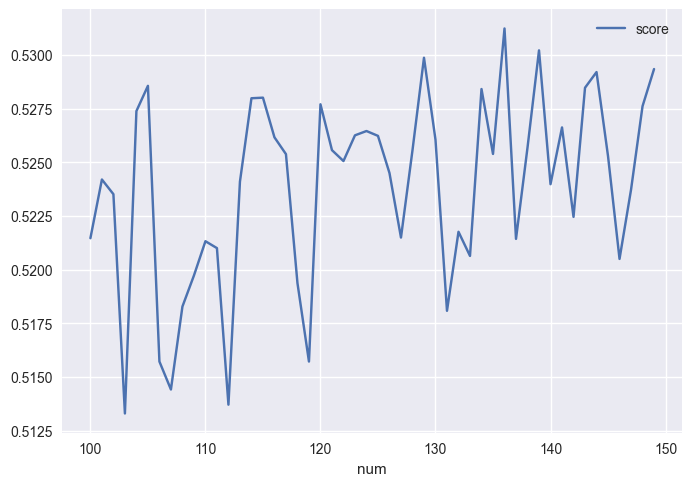

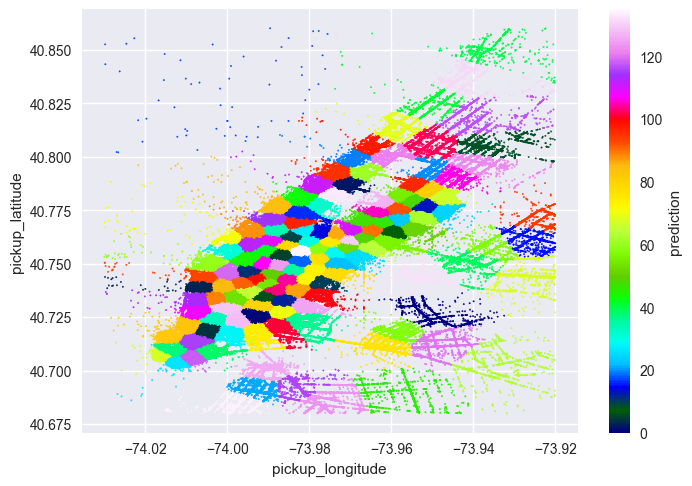

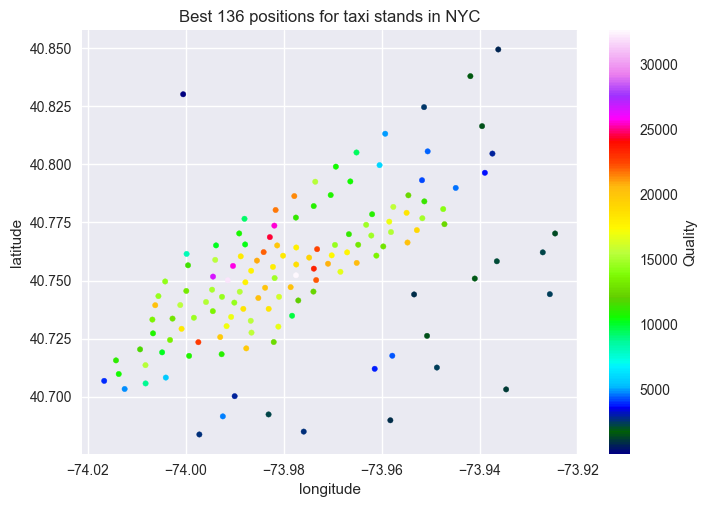

In [ ]:
from IPython.display import clear_output
# Implementation of k-means clustering 

# Create the features column
assembler = VectorAssembler(inputCols=('pickup_longitude','pickup_latitude'),outputCol="features")
dataset = assembler.transform(filteredDataDF_q4)

# Finding out the number of clusters (k)with best score between 100 until 150

def evaluate( dataset, k):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(dataset)
    predictions = model.transform(dataset)
    evaluator = ClusteringEvaluator()
    score = evaluator.evaluate(predictions)
    return score

# For each value from 100 to 150 compute the clusters and the score
df = pd.DataFrame(columns=['num','score'])
for i in range(100,150):
    df = pd.concat([df,pd.Series({"num": i, "score": evaluate(dataset,i)}).to_frame().T], ignore_index=True)
    clear_output(wait=True)
    print(df)

# Plot line chart the scores    
df.plot( x="num", y="score")

# Print clustering with the best result

k = int(df.nlargest(1,"score")["num"].values[0])

kmeans = KMeans().setK(k).setSeed(1)
model = kmeans.fit(dataset)
predictions = model.transform(dataset)

predictionsPD = predictions.toPandas()

# Display results, using the cluster number as the color
predictionsPD.plot.scatter(x='pickup_longitude',y='pickup_latitude',c="prediction",s=1,cmap='gist_ncar')

# print best amount of clusters
print('Best amount of clusters: '+str(k))

# Initialize the algorithm for best amount of clusters and display the best positions of the taxi stands
# setSeed to a integer which allows to repeat the computation and generate exactly the same clusters
kmeans = KMeans().setK(k).setSeed(1)

# Fit the model
model = kmeans.fit(dataset)

centers = model.clusterCenters()
print("Cluster Centers: ")

pandasDF = pd.DataFrame(columns=['longitude', 'latitude'])

for center in centers:
    pandasDF.loc[len(pandasDF)] = [center[0], center[1]]

# Number of elements in each cluster
summary = model.summary
list_elements= summary.clusterSizes

pandasDF['Quality'] = list_elements
pandasDF.plot.scatter(x='longitude',y='latitude',c='Quality',s=15,cmap='gist_ncar', title ='Best '+ str(k)+' positions for taxi stands in NYC')

In [ ]:
print('Number of clusters with the highest evaluation score')
display(df.nlargest(1,'score'))

Number of clusters with the highest evaluation score


,num,score
36,136.0,0.531236


#### Discussion:

Longitude and latitude are limited, therefore only the center of New York is presented. Furthermore, the sample dataset is used in our data cleanings.
We use the k-means technique to discover the optimal clustering of k clusters because we want the taxi stands to be in a certain location where the distance for all persons in that area is shortest. The data points, which are pickups and dropoffs, are gradually allocated to the cluster with the shortest distance by defining clusters.

After determining the best number of k clusters, these k starting points are inserted as the starting point into the graph/data. Then, each data point is given to the nearest centroid, and clusters are generated. These clusters comprise all data points that are closest to the centroid. Following that, the centroids are updated by forming the mean of all points per cluster, and the data points are assigned to the new centroid (the mean) with the shortest distance. This is repeated until a point of convergence is reached, which is the point at which the assignment of the data points and the position of the centroids (mean of all data points in a cluster) no longer vary.

At first, we attempted to establish the best number of clusters by computing an evaluation score per number of clusters between 100 and 150. The higher the score, the better the number of clusters. By getting the highest evaluation score, we discovered the optimal number of clusters in the sample dataset by 136 with an evaluation score of 0.531236. This is also evident in the line chart, where the peak of the maximum for our travels is 136 clusters. As a result, the 136 clusters represent the number of cab stands.

The areas of the clusters are represented in the chart below. These are the cab stand catchment areas. For example, suppose there is a person somewhere in the yellow zone who wishes to be picked up and driven, i.e. a cab. Because the distance for the individual is short, they should go to the central location of this yellow area, which is our cab stop.

The final graphic with the individual points at the end of the task depicts only the central points, so the taxi stands, with their coordinates of longitude on the x-axis and latitude on the y-axis.
The quality of the taxi stands is shown by a color bar at the edge, which reflects how in demand a cab stand is and hence the attractiveness or quality of this in absolute values. The figure reflects the number of customers/trips in a certain section of the taxi stand. Cab ranks in blue have low demand and should be reviewed as a business case. Green indicates a medium demand, which is an appropriate classification of the cab city's quality, whereas orange/red indicates a strong demand. These are in high demand and in good working order, but they may need to be enlarged to accommodate additional clients if a bottleneck emerges.
As a result of the distribution of the points in the graph, demand is highest in the city center of New York with red data points, as this is also where there is the biggest density of people/customers. Demand decreases from medium, i.e. green data points, to blue, i.e. low demand, as one moves out from the center.

## Exercise 5

Propose a problem that you think would be useful to solve with the given dataset.

**Explain the problem you propose to solve**

In [11]:
# Cleaning filtern with spark sql and not pandas

# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep
threshold_zero_trip_duration = 0
threshold_zero_trip_distance = 10

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")


dataset.createOrReplaceTempView("data")
filteredDataDF_q5 = spark.sql( """SELECT medallion,hack_license, pickup_datetime,
                                    date(pickup_datetime) AS pickup_date,
                                    dayofweek(pickup_datetime) AS pickup_weekday,
                                    hour(pickup_datetime) AS pickup_hour,
                                    dropoff_datetime, 
                                    date(dropoff_datetime) AS dropoff_date,
                                    dayofweek(dropoff_datetime) AS dropoff_weekday,
                                    hour(dropoff_datetime) AS dropoff_hour,
                                    trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_time_in_secs > """ + str(threshold_zero_trip_duration) + """ AND
                                  trip_distance >= """ + str(threshold_zero_trip_distance) + """ AND
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude) + """ AND
                                  payment_type in ('CRD','CSH')
                                  ORDER BY trip_time_in_secs ASC """
                                  )
filteredDataDF_q5.createOrReplaceTempView("data")

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-------------+------------------------+
|        label|Elements_per_Communities|
+-------------+------------------------+
|  25769803793|                    6453|
|1185410973757|                    6170|
| 412316860421|                    1093|
| 635655159814|                       9|
| 541165879322|                       7|
|1649267441699|                       4|
|1348619730950|                       4|
| 171798691903|                       3|
| 721554505786|                       3|
|1151051235346|                       3|
|1365799600153|                       3|
|1185410973730|                       3|
|1090921693213|                       2|
| 721554505733|                       2|
| 944892805178|                       2|
| 661424963592|                       2|
|1271310319622|                       2|
| 575525617670|                       2|
|1700807049224|                       2|
| 910533066785|                       2|
+-------------+------------------------+
only showing top

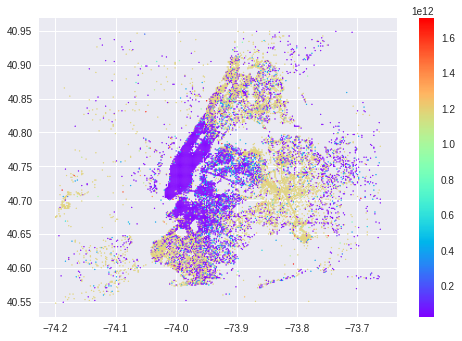

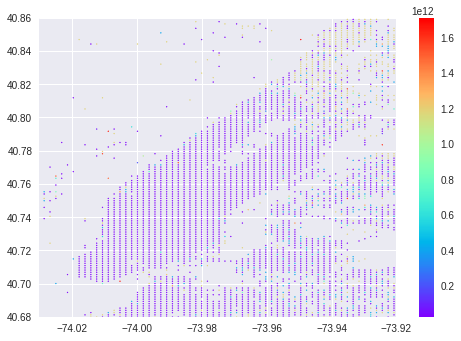

In [12]:
import networkx as nx
from graphframes import *
from graphframes import GraphFrame
from graphframes.examples import Graphs



# Create a graph: edge

preprocDF = spark.sql( """SELECT
concat('(',pickup_longitude,',',pickup_latitude,')') AS src,
concat('(',dropoff_longitude,',',dropoff_latitude,')') AS dst,
pickup_longitude, pickup_latitude,
dropoff_longitude, dropoff_latitude
FROM data""")
preprocDF.createOrReplaceTempView('data_2')
edges = spark.sql( """SELECT src, dst, 'trip' FROM data_2""")

# Create a graph: vertex

vertices = spark.sql( """SELECT src AS id, pickup_longitude AS longitude,
                pickup_latitude AS latitude FROM data_2
                UNION
                SELECT dst AS id, dropoff_longitude AS longitude,  
                dropoff_latitude AS latitude FROM data_2""")
vertices.createOrReplaceTempView("data_3")

# Create a GraphFrame
g = GraphFrame(vertices, edges)

# Using Label Propagation Algorithm (LPA)
result_lpa = g.labelPropagation(maxIter=5)

# Plot graph
result_lpa_plot = result_lpa.collect()

# Display distribution of elements to the communities based on density of edges between the nodes
from pyspark.sql.functions import sum, col, desc
result_lpa_group = result_lpa.groupBy('label') \
                    .agg(count('label').alias('Elements_per_Communities')) \
                    .sort(desc('Elements_per_Communities')) \
                    .show()

# Plot with spark
p = plt.scatter([row.longitude for row in result_lpa_plot],
            [row.latitude for row in result_lpa_plot],
            c=[row.label for row in result_lpa_plot],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()

# Plot New York city zoomed in the city center
result_lpa_plot = result_lpa.collect()

# Plot with spark
p = plt.scatter([row.longitude for row in result_lpa_plot],
            [row.latitude for row in result_lpa_plot],
            c=[row.label for row in result_lpa_plot],s=1,cmap="rainbow")
plt.colorbar(p)
plt.xlim(-74.03,-73.92)
plt.ylim(40.68,40.86)
plt.show()

#### Discussion

We are searching for communities in New York using Graphframes and a community detection technology called label propagation algorithm.
LPA is a graph community detection algorithm that is widely used. It discovers these communities by utilizing only network structure as a guide, and no prior knowledge of the communities is required.

#### Question and approach:

The goal of our analysis is to identify patterns/communities in the dataset and graph. That is, the same density of data point edges that constitute a cluster. As a result, the number of edges entering a node and the number of edges exit into other nodes. Our pickup and dropoff locations are the nodes. Thus, the edges serve as our taxi routes. We are clustering our datapoints into several communities, which is assessed by the density of node edges. Nodes with similar edge densities are grouped together in the same community.

For example, if two journeys were offered from one square to the other in two different squares/areas of the city, we would have two edges of these squares. These edges connect the various squares/areas of the city to one another. As a result, nodes are grouped together in the same community by having a similar density.

We have no information on the weights of the trips in our dataset, which contains 2 million travels. The issue is that there are so many trips that a connected component model displaying the edges of a graph, for example, would just produce a black image. This is due to an excess of black borders representing the journeys between all squares.
As a result, we have to make the assumption for our community model that we only evaluate trips that are more than 10 kilometers long. If we didn't do this, our model would concentrate practically all trips in a single community. This is because all squares/areas of the city have about the same density of edges and there is no edge weighting. As a result, all squares are nearly evenly connected by trips and constitute a single community. This issue can be overcome by limiting the dataset and incorporating only journeys greater than 10 km into the model.

#### Results:

Three large communities can be observed.
1. Trips outside of New York are indicated in yellow. (6453 elements)
2. Purple represents journeys in the city center of New York. (6170 elements)
3. Blue represents the trips between the city center and outside of New York, and hence between the purple and yellow communities. There are just 1093 elements in the blue community. As a result, detecting this 
community in the graph is more challenging, because the 6000 data points of the other two communities make up the majority of the graph.

There are, of course, outliers, thus the purple data points are also found outside of New York. This is tied, however, to the fact that we are looking at the edges, i.e. the edges that connect pickups and dropoffs. If many people leave from a square in New York's city center and are all dropped off in the same square outside of New York, e.g. the airport, these two pickup and dropoff points (nodes) belong to the same community due to the same density of incoming and outgoing edges/trips, but they are still far apart.

There are several community models, such as Louvian and Girvan-Newman, that can provide different results using different approaches. We have decided on the LPA model.
As indicated in the grouped table, three communities have a large number of elements/trips, while the rest are quite tiny. The first community has 6453 elements, the second community has 6170 elements, and the third community has 1093 elements. Following that, the following community contains only nine elements.

In the second graphic, we zoom inside New York City to see whether we can gain greater granularity and see other communities. These would then be used to represent and map the various city districts.
This is not the case because we only utilize the filter to show travels longer than 10 kilometers, remove the granularity in the city center, and focus on lengthy trips such as those to the airport. Trips within city districts are shorter, and only by considering trips under 10 kilometers can we better perceive individual city districts as unique communities. In our example, we can only see the city center as a purple community with isolated blue dots on the way to the yellow community, which represents New York's outskirts. Thus, we can delineate the big three areas to each other. These are the city center, the outer areas of New York and the area in between as a transition.

In conclusion in our case of the big map, we are at a higher level and can view the entire map of New York, getting a community of the city center in purple, a community outside of New York in yellow, and a community in blue in between as transition.